In [2]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

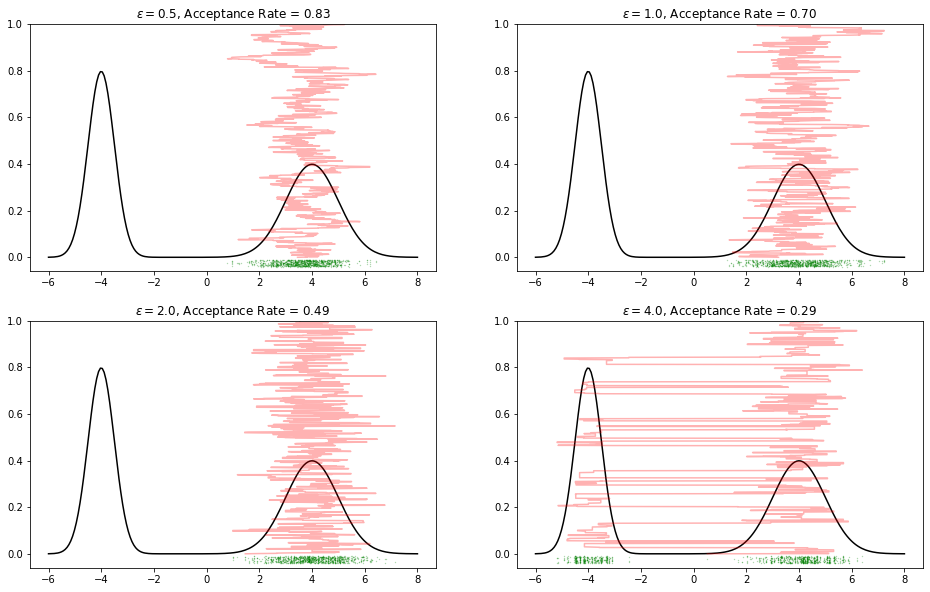

In [3]:
def p_pdf(x):
    '''Proposal distribution.'''
    return (sts.norm(-4, 0.5).pdf(x) + sts.norm(4, 1).pdf(x))

# Global parameter
iterations = 1000

def run_metropolis(target_pdf, epsilon):
    samples = np.zeros(iterations)       
    current_sample = sts.norm(0, 3).rvs()   
    isAccepted = np.zeros(iterations)
    
    for i in range(iterations):
        draw = sts.norm.rvs(current_sample, epsilon)
        acceptance_prob = target_pdf(draw) / target_pdf(current_sample)
        if acceptance_prob >= 1 or np.random.random_sample() < acceptance_prob:
            current_sample = draw
            isAccepted[i] = 1
        samples[i] = current_sample
    return(samples, isAccepted)      
    
plt.figure(figsize=(16,10))

for i, epsilon in enumerate([0.5, 1, 2, 4]):
    samples, isAccepted = run_metropolis(p_pdf, epsilon)
    x = np.linspace(-6, 8, 200)
    
    plt.subplot(2, 2, i+1)
    plt.plot(x, p_pdf(x), color="black")
    plt.plot(samples, sts.uniform.rvs(loc=-0.04, scale=0.03, size=iterations), 
             'gx', markersize = 0.8, alpha=0.3)
    plt.plot(samples, np.linspace(0, 1, iterations), alpha=0.3, color="red")
    plt.title(r'$\epsilon = {:.1f}$, Acceptance Rate = {:.2f}'.format(epsilon, np.mean(isAccepted)))
    plt.ylim([-0.06, 1])

plt.show()